In [1]:
import pandas as pd
import random 
import numpy as np
from numpy import random
from random import randint
import math
from scipy.stats import truncnorm
from matplotlib import pyplot as plt


In [2]:
# get normally distributed numbers between 300-1200

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = get_truncated_normal(mean=(300+1200)/2, sd=100, low=300, upp=1200)
s = X.rvs(5000)
randomInts = np.round(s)
randomInts

array([885., 907., 863., ..., 797., 713., 652.])

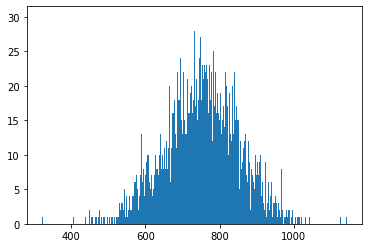

In [3]:
# check normal distribution

axis = np.arange(start=min(s), stop = max(s) + 1)
plt.hist(s, bins = axis)
plt.show()


In [4]:
#create policy table
policy_df = pd.DataFrame()                                                                                                                                                                     
indexNum = list(range(1, 5001))
policy_df["Policy_ID"] = indexNum                                                                                                                               
policy_df["Premiun"] = randomInts                                                                                                                                              
policy_df

,Policy_ID,Premiun
0,1,885.0
1,2,907.0
2,3,863.0
3,4,793.0
4,5,619.0
...,...,...
4995,4996,586.0
4996,4997,667.0
4997,4998,797.0
4998,4999,713.0


In [5]:
#generate random names
import names
name = []
for i in range(5000):
    name.append(names.get_full_name())
    
name[:10]

['Elmer Marshall',
 'Lisa Wallace',
 'Alejandro Wilson',
 'Michael Boyer',
 'John Leblanc',
 'Robert Fitzgerald',
 'Rosemarie Vogus',
 'Douglas Kaufman',
 'Christopher Warner',
 'Georgann Ormsby']

In [6]:
#normally distributed age between 18-99
age_norm = get_truncated_normal(mean=(18+99)/2, sd=10, low=18, upp=99)

#create owner table
dim_owner_df = pd.DataFrame() 
dim_owner_df["Owner_ID"] = indexNum                                                                                                                               
dim_owner_df["Name"] = name
dim_owner_df["Age"] = np.rint(age_norm.rvs(5000))
dim_owner_df["Policy_ID"] = policy_df.Policy_ID
dim_owner_df["Gender"] = np.random.choice(['F','M'], size=5000)  
dim_owner_df


,Owner_ID,Name,Age,Policy_ID,Gender
0,1,Elmer Marshall,49.0,1,F
1,2,Lisa Wallace,49.0,2,M
2,3,Alejandro Wilson,56.0,3,F
3,4,Michael Boyer,60.0,4,M
4,5,John Leblanc,72.0,5,M
...,...,...,...,...,...
4995,4996,Ray Schram,45.0,4996,F
4996,4997,Paul Sherratt,60.0,4997,M
4997,4998,Joseph Davis,52.0,4998,F
4998,4999,Paul Tindell,39.0,4999,F


In [7]:
#generate random addresses
import json

f = open("rrad/addresses-us-all.min.json",) 
data = json.loads(f.read())


In [8]:
address = []
city = []
state = []
zipcode = []
for i in range(5000):
    
    a=random.choice(data["addresses"])
    address.append(a["address1"])
    
    if "city" in a.keys():
        city.append(a["city"])
    else:
        city.append("None")
        
    state.append(a["state"])
    zipcode.append(a["postalCode"])

city

['Glendale',
 'Manchester',
 'Everett',
 'Louisville',
 'Arvada',
 'Panama City Beach',
 'Crofton',
 'Piedmont',
 'Fayetteville',
 'Billerica',
 'Washington',
 'Stowe',
 'Bethany',
 'Washington',
 'Fremont',
 'Easton',
 'Arvada',
 'Riverview',
 'Manchester',
 'Glen Burnie',
 'Paso Robles',
 'Louisville',
 'Panama City',
 'Norman',
 'Louisville',
 'Annapolis',
 'Pasadena',
 'Fayetteville',
 'Manchester',
 'Montgomery',
 'Washington',
 'Manchester',
 'Nashville',
 'Saint Albans City',
 'Panama City',
 'Pooler',
 'Louisville',
 'Panama City',
 'Nashville',
 'Berkeley',
 'Montgomery',
 'Louisville',
 'Glen Burnie',
 'Arvada',
 'Montgomery',
 'Montgomery',
 'Panama City',
 'Oklahoma City',
 'Plymouth',
 'Arvada',
 'New Bedford',
 'Manchester',
 'Fayetteville',
 'Nashville',
 'Fayetteville',
 'Hayward',
 'Arvada',
 'None',
 'Nashville',
 'Hartford',
 'Panama City Beach',
 'Arvada',
 'Louisville',
 'Fair Haven',
 'Manchester',
 'Norman',
 'Montgomery',
 'Montgomery',
 'Port Charlotte',
 'Loui

In [9]:
len(city)

5000

In [10]:
#create location table
dim_location_df = pd.DataFrame()                                                                                                                                                                     
dim_location_df["Location_ID"] = indexNum                                                                                                                               
dim_location_df["Address"] = address
dim_location_df["City"] = city
dim_location_df["State"] = state
dim_location_df["Zip"] = zipcode
dim_location_df["Policy_ID"] = policy_df.Policy_ID
dim_location_df

,Location_ID,Address,City,State,Zip,Policy_ID
0,1,7180 West Paraiso Drive,Glendale,AZ,85310,1
1,2,200 West Center Street,Manchester,CT,06040,2
2,3,16 Cabot Street,Everett,MA,02149,3
3,4,8007 Kendrick Crossing Lane,Louisville,KY,40291,4
4,5,7072 Quail Street,Arvada,CO,80004,5
...,...,...,...,...,...,...
4995,4996,5119 Marla Drive,Panama City,FL,32404,4996
4996,4997,4 Eastview Lane,Savannah,GA,31410,4997
4997,4998,343 Daman Drive,Montgomery,AL,36108,4998
4998,4999,5631 West Colter Street,Glendale,AZ,85301,4999


In [11]:
#create time table
dim_time_df = pd.DataFrame() 
dim_time_df["Time_ID"] = indexNum                                                                                                                               
dim_time_df["Day"] = random.randint(1,31,size=5000)
dim_time_df["Month"] = random.randint(1,12,size=5000)
dim_time_df["Year"] = np.random.choice(['2019','2020'], size=5000)
dim_time_df["Policy_ID"] = policy_df.Policy_ID
dim_time_df

,Time_ID,Day,Month,Year,Policy_ID
0,1,17,7,2020,1
1,2,11,9,2020,2
2,3,13,10,2020,3
3,4,26,2,2020,4
4,5,24,1,2020,5
...,...,...,...,...,...
4995,4996,2,8,2020,4996
4996,4997,16,4,2019,4997
4997,4998,3,10,2020,4998
4998,4999,4,10,2020,4999
